In [26]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings

In [27]:
# ignore warnings
warnings.filterwarnings('ignore')

In [28]:
# load dataset
df = pd.read_excel("WEOOct2020all.xlsx")

for year in range(1980, 2026):
    df[year] = pd.to_numeric(df[year].str.replace(',', ''), errors='coerce').fillna(0)


In [29]:
df.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,0.0,...,1255.288,1270.216,1319.902,1253.906,1304.063,1363.060,1424.397,1481.497,1540.937,2019.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2019.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,0.0,...,1285.460,1327.690,1469.596,1465.922,1597.738,1741.832,1893.023,2047.665,2215.013,2019.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2019.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2019.0


### Top 10 countries that grew "Gross domestic product per capita" the most over the last decade

In [30]:
gdp_data = df[df["WEO Subject Code"] == "NGDPRPPPPC"]
gdp_data

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After
7,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",0.000,...,2102.784,2078.476,2111.253,1961.102,1993.691,2037.035,2080.842,2115.599,2151.006,2019.0
52,914,ALB,NGDPRPPPPC,Albania,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",5557.570,...,13088.307,13654.821,13944.393,12915.116,13724.042,14545.728,15197.035,15747.620,16313.618,2018.0
97,612,DZA,NGDPRPPPPC,Algeria,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",9029.291,...,11458.757,11385.311,11252.807,10445.131,10584.812,10671.724,10619.484,10562.476,10504.567,2019.0
142,614,AGO,NGDPRPPPPC,Angola,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",3248.269,...,7681.958,7363.118,7084.321,6602.074,6616.756,6615.727,6675.457,6725.446,6718.419,2017.0
187,311,ATG,NGDPRPPPPC,Antigua and Barbuda,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",8035.578,...,20190.631,21267.016,21652.158,17648.967,18211.195,19935.323,21276.834,21826.092,22328.332,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,582,VNM,NGDPRPPPPC,Vietnam,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",1437.143,...,8996.385,9537.644,10110.001,10174.528,10755.187,11450.356,12171.296,12905.211,13650.958,2019.0
8602,487,WBG,NGDPRPPPPC,West Bank and Gaza,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",0.000,...,6020.972,5943.354,5851.869,5029.642,5315.119,5455.627,5440.946,5426.354,5414.272,2019.0
8647,474,YEM,NGDPRPPPPC,Yemen,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",0.000,...,2025.071,1984.736,1973.141,1826.982,1791.334,1793.083,1870.111,1946.498,2024.990,2019.0
8692,754,ZMB,NGDPRPPPPC,Zambia,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",2957.214,...,3407.306,3438.080,3383.327,3124.204,3049.721,2991.521,2939.844,2889.791,2840.191,2018.0


In [31]:
current_time = gdp_data[2023]
ten_years_ago = gdp_data[2024]

gdp_data['Growth'] = current_time - ten_years_ago

In [32]:
top10 = gdp_data.sort_values(by='Growth', ascending=False).head(10)

In [33]:
top10

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After,Growth
2347,642,GNQ,NGDPRPPPPC,Equatorial Guinea,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",0.000,...,20403.820,18508.190,16823.433,16647.517,15378.693,14721.243,14062.010,13364.721,2015.0,659.233
8242,466,ARE,NGDPRPPPPC,United Arab Emirates,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",171616.041,...,61835.735,61009.669,55312.900,54396.240,53944.105,53684.339,53427.904,53174.705,2005.0,256.435
4102,443,KWT,NGDPRPPPPC,Kuwait,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",60816.815,...,45188.901,44150.683,39483.944,38662.021,38828.198,38689.635,38555.218,38424.913,2018.0,134.417
5407,836,NRU,NGDPRPPPPC,Nauru,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",0.000,...,8983.783,9458.460,9342.485,9277.737,9181.320,9075.096,8949.846,8825.991,2016.0,125.250
3562,433,IRQ,NGDPRPPPPC,Iraq,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",0.000,...,10793.201,10985.317,9415.335,9408.790,9456.971,9683.817,9567.405,9411.812,2013.0,116.412
4417,672,LBY,NGDPRPPPPC,Libya,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",99828.945,...,12498.714,13598.932,4490.087,7825.324,12004.710,12968.455,12878.476,12789.387,2017.0,89.979
97,612,DZA,NGDPRPPPPC,Algeria,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",9029.291,...,11385.311,11252.807,10445.131,10584.812,10671.724,10619.484,10562.476,10504.567,2019.0,57.008
7792,537,TLS,NGDPRPPPPC,Timor-Leste,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",0.000,...,3079.888,3113.618,3814.071,3127.141,3067.831,3077.191,3024.413,3046.328,2018.0,52.778
8692,754,ZMB,NGDPRPPPPC,Zambia,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",2957.214,...,3438.080,3383.327,3124.204,3049.721,2991.521,2939.844,2889.791,2840.191,2018.0,50.053
1762,634,COG,NGDPRPPPPC,Republic of Congo,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",4239.252,...,4552.218,4413.572,4004.679,3874.867,3853.960,3858.152,3824.602,3818.085,2017.0,33.550


### OECD countries' "Population" growth over the last decade

In [34]:
oecd_countries_iso_codes = [
    'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CZE', 'DNK', 'EST', 'FIN',
    'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR',
    'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK',
    'SVN', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA',
]

In [35]:
oecd_df = df[(df['ISO'].isin(oecd_countries_iso_codes)) & (df["Subject Descriptor"] == "Population")]

In [36]:
columns_to_keep = ['Country', 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
oecd_population_df = oecd_df[columns_to_keep]

In [37]:
oecd_population_df.set_index('Country', inplace=True)
oecd_population_df_T = oecd_population_df.transpose()

<Figure size 1200x800 with 0 Axes>

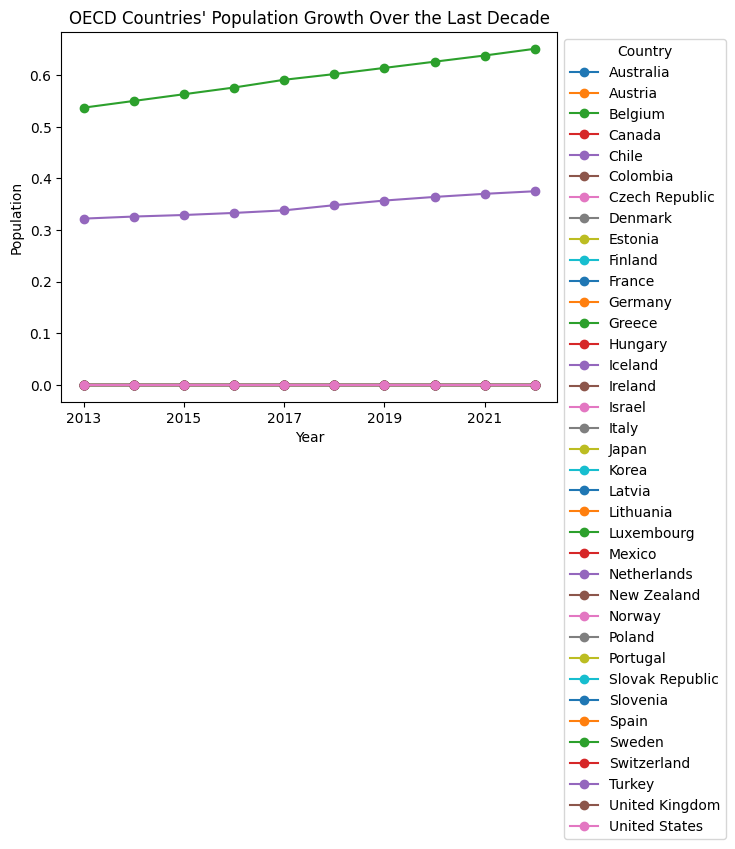

In [38]:
plt.figure(figsize=(12, 8))
oecd_population_df_T.plot(kind='line', marker='o')
plt.title("OECD Countries' Population Growth Over the Last Decade")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()


### GDP growth figures in separate charts and save them as PNG files

Save the GDP growth figures in separate charts and save them as PNG files


In [39]:
top10_filtered = top10[columns_to_keep]

top10_filtered

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2347,Equatorial Guinea,33450.827,32231.181,28149.294,24698.691,22449.899,20403.820,18508.190,16823.433,16647.517,15378.693
8242,United Arab Emirates,61030.488,61791.499,63054.885,63170.448,62864.043,61835.735,61009.669,55312.900,54396.240,53944.105
4102,Kuwait,53454.223,51760.817,50278.943,50004.853,46479.257,45188.901,44150.683,39483.944,38662.021,38828.198
5407,Nauru,8093.778,9401.050,9237.636,9097.954,8342.686,8983.783,9458.460,9342.485,9277.737,9181.320
3562,Iraq,10623.987,10218.534,10414.475,11680.102,11091.156,10793.201,10985.317,9415.335,9408.790,9456.971
4417,Libya,17755.000,8351.106,7191.723,6594.481,10708.893,12498.714,13598.932,4490.087,7825.324,12004.710
97,Algeria,11093.337,11274.365,11443.134,11556.853,11458.757,11385.311,11252.807,10445.131,10584.812,10671.724
7792,Timor-Leste,3182.658,3264.734,3302.740,3355.505,3165.802,3079.888,3113.618,3814.071,3127.141,3067.831
8692,Zambia,3328.484,3379.555,3372.894,3393.896,3407.306,3438.080,3383.327,3124.204,3049.721,2991.521
1762,Republic of Congo,6262.419,6520.044,6135.166,5344.951,4986.526,4552.218,4413.572,4004.679,3874.867,3853.960


In [40]:
for index, row in top10_filtered.iterrows():
    country = row['Country']
    years = [int(year) for year in top10_filtered.columns[1:]]
    gdp_values = row[1:].values

    plt.plot(years, gdp_values, marker='o')
    plt.title(f'GDP Growth Over Years - {country}')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.grid(True)
    
    # plt.savefig(f'{country}_GDP_Growth.png')
    
    plt.savefig(f'photos/{country}_GDP_Growth.png')

    plt.clf()

print("Saved successfully.")


Saved successfully.


<Figure size 640x480 with 0 Axes>

### Task 4

In [41]:
gdp_data = df[df['WEO Subject Code'] == 'NGDPRPPPPC'].drop(columns=['Subject Descriptor'])
export_data = df[df['WEO Subject Code'] == 'TXG_RPCH'].drop(columns=['Subject Descriptor'])

In [42]:
# Combine GDP and export data
columns_to_keep = ['Country']
for year in range(1980, 2026):
    columns_to_keep.append(f"{year}_gdp")
    columns_to_keep.append(f"{year}_export")
combined_data = pd.merge(gdp_data, export_data, on='Country', suffixes=('_gdp', '_export'))
combined_data = combined_data[columns_to_keep]
combined_data

,Country,1980_gdp,1980_export,1981_gdp,1981_export,1982_gdp,1982_export,1983_gdp,1983_export,1984_gdp,...,2021_gdp,2021_export,2022_gdp,2022_export,2023_gdp,2023_export,2024_gdp,2024_export,2025_gdp,2025_export
0,Afghanistan,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,1993.691,0.000,2037.035,0.000,2080.842,0.000,2115.599,0.000,2151.006,0.0
1,Albania,5557.570,0.0,5757.860,0.0,5800.944,0.000,5741.680,0.0,5734.583,...,13724.042,0.000,14545.728,0.000,15197.035,0.000,15747.620,0.000,16313.618,0.0
2,Algeria,9029.291,0.0,9019.899,0.0,9298.589,-0.458,9489.245,0.0,9708.785,...,10584.812,0.000,10671.724,0.320,10619.484,0.219,10562.476,-0.067,10504.567,0.0
3,Angola,3248.269,0.0,3023.625,0.0,2945.697,0.000,2991.109,0.0,3088.912,...,6616.756,0.187,6615.727,0.882,6675.457,0.264,6725.446,0.000,6718.419,0.0
4,Antigua and Barbuda,8035.578,0.0,8408.028,0.0,8498.438,0.000,9085.003,0.0,10172.400,...,18211.195,0.000,19935.323,0.000,21276.834,0.000,21826.092,0.000,22328.332,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,1437.143,0.0,1489.394,0.0,1579.654,0.000,1660.202,0.0,1765.816,...,10755.187,0.000,11450.356,0.000,12171.296,0.000,12905.211,0.000,13650.958,0.0
191,West Bank and Gaza,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,5315.119,0.000,5455.627,0.000,5440.946,0.000,5426.354,0.000,5414.272,0.0
192,Yemen,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,1791.334,0.000,1793.083,0.000,1870.111,0.000,1946.498,0.000,2024.990,0.0
193,Zambia,2957.214,0.0,3052.876,0.0,2871.765,0.000,2752.526,0.0,2624.524,...,3049.721,0.000,2991.521,0.904,2939.844,0.555,2889.791,0.000,2840.191,0.0


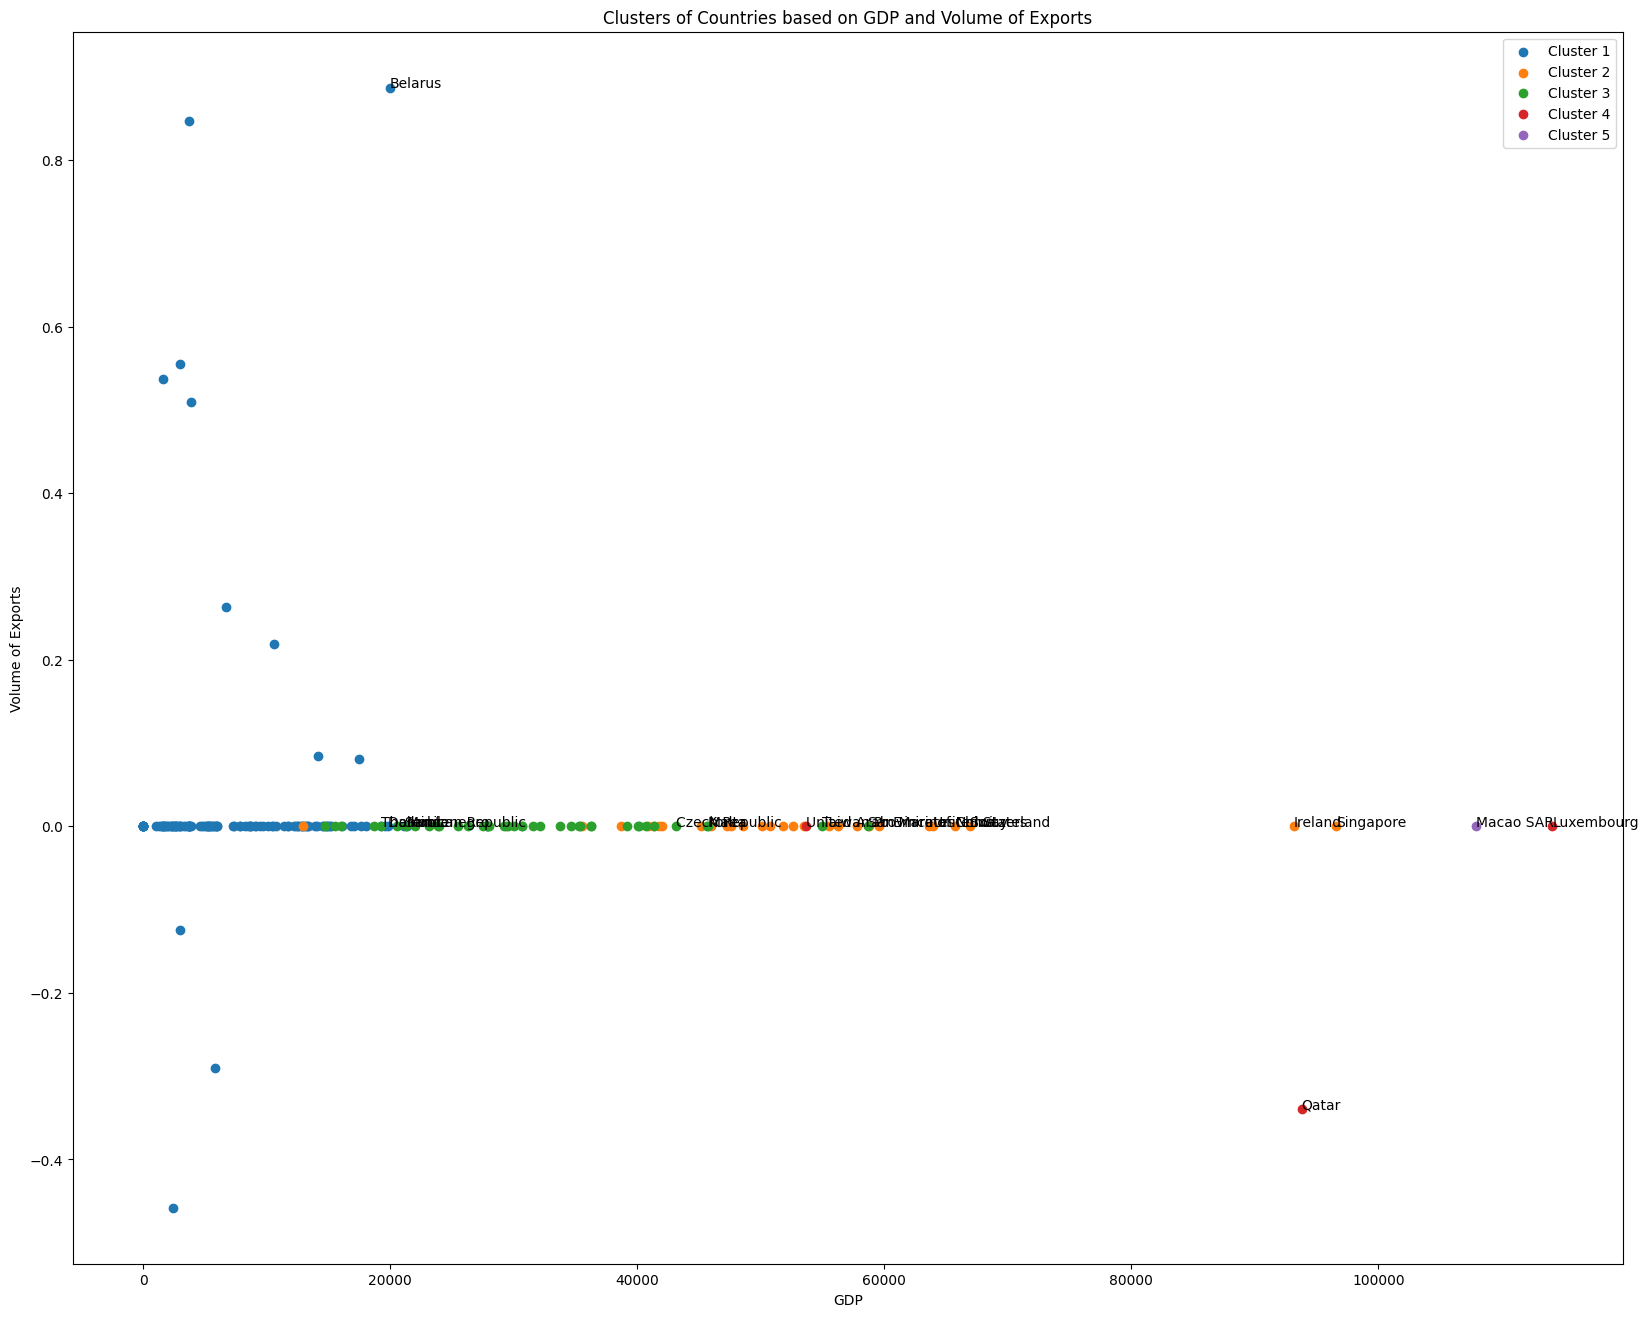

In [43]:
# K-means clustering
X = combined_data[columns_to_keep[1:]]
kmeans = KMeans(n_clusters=5, random_state=42)
combined_data['cluster'] = kmeans.fit_predict(X)

# Plot the clusters and label top 5 countries based on GDP
plt.figure(figsize=(20, 16))
for i in range(5):
    cluster_data = combined_data[combined_data['cluster'] == i]
    plt.scatter(cluster_data['2023_gdp'], cluster_data['2023_export'], label=f'Cluster {i + 1}')

# Add labels for the top 5 countries based on GDP in each cluster
for i in range(5):
    cluster_data = combined_data[combined_data['cluster'] == i]
    top_countries = cluster_data.nlargest(5, '2018_gdp')
    for _, country in top_countries.iterrows():
        plt.annotate(country['Country'], (country['2023_gdp'], country['2023_export']))

plt.xlabel('GDP')
plt.ylabel('Volume of Exports')
plt.title('Clusters of Countries based on GDP and Volume of Exports')
plt.legend()
plt.show()


### Task 5

In [44]:
result = df[df[2015].notna()].groupby('Subject Descriptor')[2015].count().sort_values(ascending=False)
result

Subject Descriptor
Gross domestic product, current prices                                                585
Gross domestic product per capita, current prices                                     585
General government total expenditure                                                  390
Inflation, end of period consumer prices                                              390
Inflation, average consumer prices                                                    390
Gross domestic product, constant prices                                               390
Gross domestic product per capita, constant prices                                    390
Current account balance                                                               390
General government structural balance                                                 390
General government primary net lending/borrowing                                      390
General government gross debt                                                    

### Task 6

In [45]:
!pip install pycountry-convert


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return ""

In [47]:
gdp_data = df.copy()

# clear all gdp related rows related to GDP except NGDPRPPPPC
exclude = [
    "PPPPC",
    "NGDPDPC",
    "NGDPPC",
    "NGDPRPC",
    "NGDP_D",
    "PPPGDP",
    "NGDPD",
    "NGDP",
    "NGDP_RPCH",
    "NGDP_R",
    "PPPSH"
]
gdp_data = gdp_data[~gdp_data["WEO Subject Code"].isin(exclude)].drop(
    columns=[
        "WEO Country Code",
        "ISO",
        "Subject Notes",
        "Subject Descriptor",
        "Units",
        "Scale",
        "Country/Series-specific Notes",
        "Estimates Start After",
    ]
)

gdp_data.head()

,WEO Subject Code,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
7,NGDPRPPPPC,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2100.222,2102.784,2078.476,2111.253,1961.102,1993.691,2037.035,2080.842,2115.599,2151.006
11,NGAP_NPGDP,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
13,PPPEX,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,NID_NGDP,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
15,NGSD_NGDP,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [48]:
melted_df = pd.melt(gdp_data, id_vars=['Country', 'WEO Subject Code'], var_name='year', value_name='value')

gdp_data = melted_df.pivot_table(index=['year', 'Country'], columns='WEO Subject Code', values='value').reset_index()

gdp_data = gdp_data.rename_axis(columns=None).reset_index()
gdp_data.drop(columns='index', inplace=True)

In [49]:
gdp_data["Continent"] = gdp_data["Country"].apply(country_to_continent)
gdp_data.drop(columns="Country", inplace=True)

In [50]:
# X contains the features, y contains the target variable
features = gdp_data.drop(["NGDPRPPPPC"], axis=1)
target = gdp_data["NGDPRPPPPC"]

features_encoded = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded, target, test_size=0.2, random_state=42
)

In [2]:
# # Linear Regression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

NameError: name 'LinearRegression' is not defined

In [52]:
# Random Forest 

model = RandomForestRegressor(max_depth=30)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 113432646.62349696


In [53]:
print(list(zip(predictions, y_test))[:10])

[(20989.04633000003, 22358.461), (2875.9741618187895, 3562.465), (17252.281860000003, 23333.581), (8459.30390873016, 6845.951), (9076.360250000009, 9134.041), (41561.969360000025, 47092.469), (20851.028650000026, 23553.574), (4234.498780833336, 4947.452), (6474.745890592793, 9380.995), (7949.11731850151, 8100.48)]


In [54]:
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": features_encoded.columns, "Importance": feature_importances}
)

# print(feature_importance_df)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Display the top 5 features
top_5_features = feature_importance_df.head(5)
top_5_features = top_5_features.map(lambda x: "Continent" if type(x) == str and x.startswith("Continent") else x)
top_5_features

,Feature,Importance
29,PPPEX,0.146752
37,Continent,0.135097
19,LP,0.123277
0,year,0.114608
1,BCA,0.088037


### Train another predictor that uses those top 5 features

In [55]:
selected_features = top_5_features["Feature"].tolist() + ["NGDPRPPPPC"]

new_gdp_data = gdp_data[selected_features]

features = new_gdp_data[selected_features].drop(["NGDPRPPPPC"], axis=1)
target = new_gdp_data["NGDPRPPPPC"]

features_encoded = pd.get_dummies(features)

X_train, X_test, y_train, y_test = train_test_split(
    features_encoded, target, test_size=0.2, random_state=42
)

model = RandomForestRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 176006851.47715473


In [56]:
features

,PPPEX,Continent,LP,year,BCA
0,0.000,Asia,0.000,1980,0.000
1,0.000,Europe,0.000,1980,0.001
2,0.000,Africa,0.000,1980,0.242
3,0.000,Africa,0.000,1980,0.070
4,0.000,North America,0.068,1980,0.000
...,...,...,...,...,...
8965,8348.323,Asia,0.000,2025,-0.009
8966,0.000,,0.000,2025,0.000
8967,0.000,Asia,0.000,2025,-0.052
8968,0.000,Africa,0.000,2025,0.136


In [57]:
print(list(zip(predictions, y_test))[:10])

[(21996.82168000003, 22358.461), (3067.69827, 3562.465), (18769.643208416666, 23333.581), (11695.973494979437, 6845.951), (12370.576159999997, 9134.041), (41659.91260000001, 47092.469), (21822.110080000024, 23553.574), (4073.4144600000027, 4947.452), (7924.707700000007, 9380.995), (11645.35398, 8100.48)]


In [58]:
# export the model to a file
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)